- BS=4, lr=1e-4, 20 epochs, batch-norm, L2
    - Failed
- BS=1, lr=1e-4, 10 epochs, L2 (converged after 1 epoch as you'd expect)
    - Failed
    - Don't think batch norm was on though?
- BS=50, lr=1e-4, 10 epochs, L2 failed (but the PSNR monotonically increased from ~6 to ~20 which was nice)
    - Failed
    - Don't think batch norm was on though?
- BS=10, lr=1e-4, 10 epochs, L1
    - Failed, but error was still dropping off, so I'll give it 20 epochs. If that fails, then we'll look at SSIM
    
NOTE I DO NOT HAVE SAVED RESULTS FOR ANYTHING ABOVE HERE

- BS=10, lr=1e-3, 10 epochs, L1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import torch
import matplotlib.pyplot as plt
from model import HDRPointwiseNN
from MotionBlurDataset import MotionBlurDataset
import pickle
import numpy as np
from skimage.exposure import rescale_intensity

In [4]:
state_dict = torch.load("../model-data/model.pth")
with open('../model-data/params.pkl', 'rb') as f:
    params = pickle.load(f)
    
model = HDRPointwiseNN(params=params)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [5]:
dataset = MotionBlurDataset("../data/train")
loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, drop_last=True)

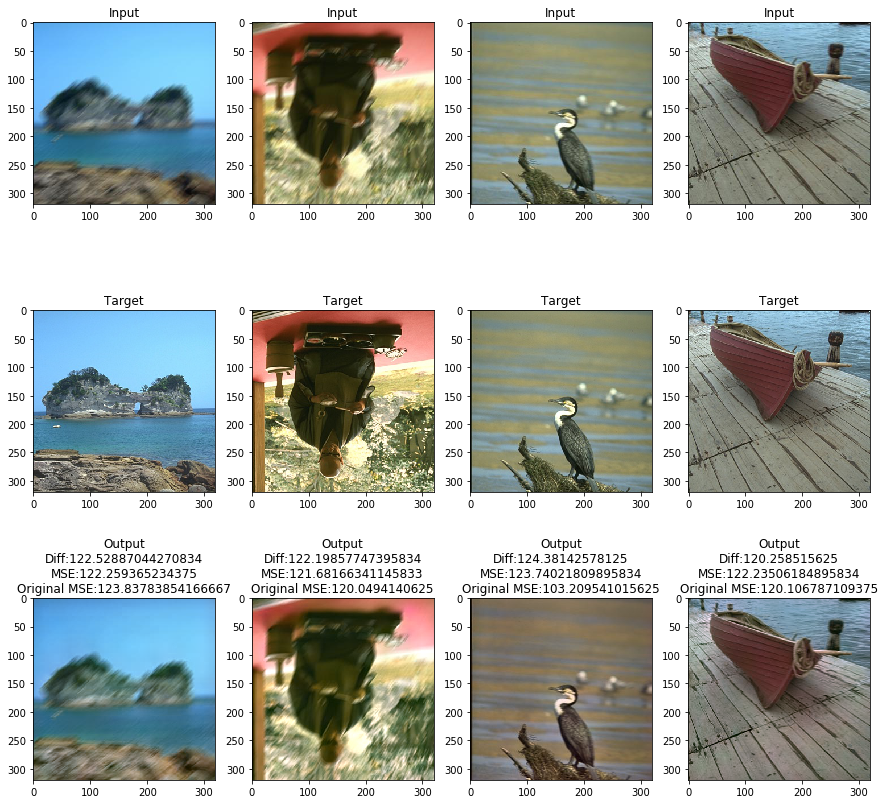

In [6]:
model.eval()
lr, hr, target = next(iter(loader))

plt.figure(figsize=(15, 15))
with torch.no_grad():
    outputs = model(lr, hr).detach().numpy()
    outputs[outputs < 0] = 0
    outputs[outputs > 1] = 1
    for i in range(len(outputs)):
        plt.subplot(3, 4, 1 + i)
        hr_img = np.transpose(hr[i], (1, 2, 0)).numpy()
        hr_img = rescale_intensity(hr_img, out_range=(0.0,255.0)).astype(np.uint8)
        plt.imshow(hr_img)
        plt.title("Input")
        
        plt.subplot(3, 4, 5 + i)
        target_img = np.transpose(target[i], (1, 2, 0)).numpy()
        target_img = rescale_intensity(target_img, out_range=(0.0,255.0)).astype(np.uint8)
        plt.imshow(target_img)
        plt.title("Target")
        
        plt.subplot(3, 4, 9 + i)
        img = np.transpose(outputs[i], (1, 2, 0))
        img = rescale_intensity(img, out_range=(0.0,255.0)).astype(np.uint8)
        plt.imshow(img)
        average_change = np.mean(np.square(img) - np.square(hr_img))
        mse = np.mean(np.square(img) - np.square(target_img))
        original_mse = np.mean(np.square(target_img) - np.square(hr_img))
        plt.title("Output\nDiff:{}\nMSE:{}\nOriginal MSE:{}".format(average_change, mse, original_mse))
        
plt.show()

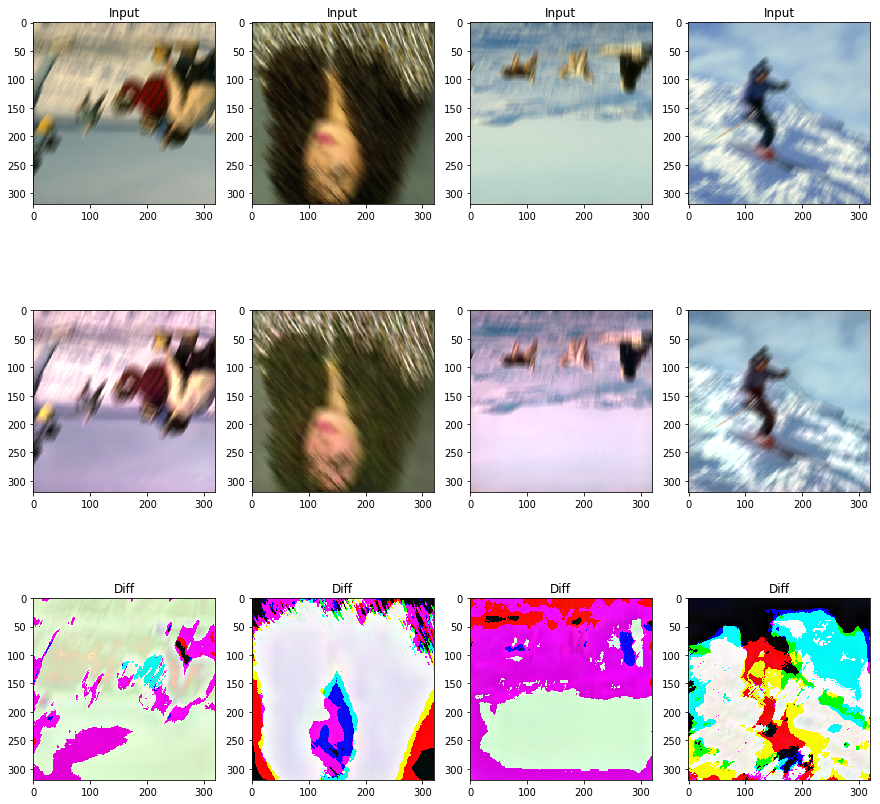

In [7]:
model.eval()
lr, hr, target = next(iter(loader))

plt.figure(figsize=(15, 15))
with torch.no_grad():
    outputs = model(lr, hr).detach().numpy()
    outputs[outputs < 0] = 0
    outputs[outputs > 1] = 1
    for i in range(len(outputs)):
        plt.subplot(3, 4, 1 + i)
        hr_img = np.transpose(hr[i], (1, 2, 0)).numpy()
        hr_img = rescale_intensity(hr_img, out_range=(0.0,255.0)).astype(np.uint8)
        plt.imshow(hr_img)
        plt.title("Input")
                
        plt.subplot(3, 4, 5 + i)
        img = np.transpose(outputs[i], (1, 2, 0))
        img = rescale_intensity(img, out_range=(0.0,255.0)).astype(np.uint8)
        plt.imshow(img)
        
        plt.subplot(3, 4, 9 + i)
        diff_img = np.abs(hr_img - img)
        diff_img = rescale_intensity(diff_img, out_range=(0.0,255.0)).astype(np.uint8)
        plt.imshow(diff_img)
        plt.title("Diff")
        
plt.show()